# Intro

This will be an example of data analysis on data of data analyst jobs from the website glassdoor.

I'm aware I might not be using the most efficient ways of doing things (I specialise more in the deep data science side of things: deep learning, etc), to some advanced programmers this might make their eyes bleed, however I'm using this as an end to end project (without the scraping, I'm saving that for another project) to learn from, if you have any advice I would appreciate it if you shared it with me wherever that's via issues on the github page or a comments section. Thanks!

This will be seperated into chapters where various transformations and various other methods will be applied/used;

**[Insights](#Insights)** = Insights gathered after all the transformations in the chapters below. If you are curious how all these were generated then read the later chapters to see the **Python code** used.

**[Chapter 1](#Chapter-1)** = Simple transformations of string data into appropriate integer data. 

**[Chapter 2](#Chapter-2)** = Some form of **Regex (Regular Expressions)** done in my own unorthodox way. 

**[Chapter 3](#Chapter-3)** = 

-------------------------------------------------------------------------------------------------------------------------------

Import necessary Packages

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
plt.style.use('seaborn-bright')

# Insights
<a id='Insights'></a>

below we can see that on average individuals with python as a skill with be paid more.

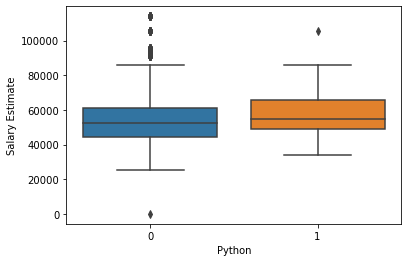

In [34]:
y = df['Salary Estimate']
x = df['Python']
sns.boxplot(x, y)

In the plot below it seems like on average newer companies tend to pay more for data analysts, I believe this is due to newer companies are more in need for analysts (especially with the rise of deep learning and machine learning) whilst companies which are already well settled see less use of it as their business plan does not revolve around it.

Text(0, 0.5, 'Salary Estimate')

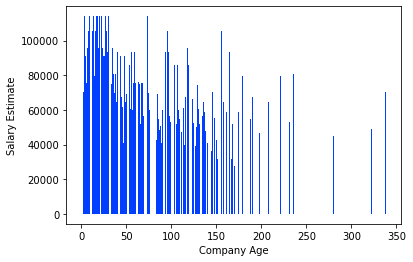

In [54]:
y = df['Salary Estimate']
x = df['Company Age']
plt.bar(x, y)
plt.xlabel('Company Age')
plt.ylabel('Salary Estimate')

The overall rating given by (I am assuming) employees (of the USA) of the company on glassdoor does not seem to have any coorelation on the Salary estimate, from this we can hypothesise that salary was not an influencing factor on how well employees for data analysts roles percieved the company they were working for.

<function matplotlib.pyplot.show(*args, **kw)>

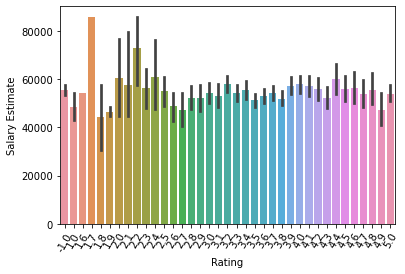

In [63]:
y = df['Salary Estimate']
x = df['Rating']
h = sns.barplot(x, y)
j = h.set_xticklabels(h.get_xticklabels(), rotation=60)
plt.show

-------------------------------------------------------------------------------------------------------------------------------

# Chapter 1
<a id='Chapter 1'></a>

Load original data from CSV and view it and start planning transoformations to get it in a useable format.

In [3]:
pd.read_csv('C:/Users/Asus/Desktop/python/Data/jobs.csv')

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248,2248,RQS - IHHA - 201900004460 -1q Data Security An...,$78K-$104K (Glassdoor est.),Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO","Alpharetta, GA",51 to 200 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,-1,-1
2249,2249,Senior Data Analyst (Corporate Audit),$78K-$104K (Glassdoor est.),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO","Centennial, CO",10000+ employees,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",-1
2250,2250,"Technical Business Analyst (SQL, Data analytic...",$78K-$104K (Glassdoor est.),"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,-1,-1,-1,-1
2251,2251,"Data Analyst 3, Customer Experience",$78K-$104K (Glassdoor est.),Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO","West Chester, OH",201 to 500 employees,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),-1,-1


Assign loaded dataframe.

In [4]:
df = pd.read_csv('C:/Users/Asus/Desktop/python/Data/jobs.csv')

Drop unnecessary columns with the keyword inplace so we dont have to assign the new dataframes created.

In [5]:
df.drop('Easy Apply', axis=1, inplace=True)
df.drop('Competitors', axis=1, inplace=True)
df.drop('Headquarters', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

Convert the 'k' in 'salary estimate' column to thousands and get rid of unncessary characters, then convert range to the median value (remember it is in USD), then convert USD to £'s (today's rate : $1 = £0.76), try and except to capture potential nuls or anything else that isnt what we expect and delete the offending row (Be sure to check the offending rows beforehand! In this case it was null values denoted with a '-1' as shown below in the output).

In [6]:
for j, i in enumerate(df['Salary Estimate']):
        i = i.replace('K', '000')
        i = i.replace('(Glassdoor est.)', '')
        i = i.replace('$', '')
        i = i.strip('')
        indexofdash = i.find('-')
        num1 = i[:indexofdash]
        num2 = i[indexofdash+1:]
        try:
            new = int(((int(num1) + int(num2))/2)*0.76)
            df.iloc[j, 1] = new
        except ValueError:
            print(f"row {j} cannot be parsed as an int, it's value is {i}; dropping row")
            df.drop(j)

row 2149 cannot be parsed as an int, it's value is -1; dropping row


Convert column to be of 'integer' type rather than 'object', then use keyword downcast to convert to lowest memory-form of the integer datatype to save memory (within reason for the values in the column, which pandas decides).

In [7]:
df['Salary Estimate'] = pd.to_numeric(df['Salary Estimate'], downcast='integer')

Make new column for age of company (better for machine learning than year founded if we are going that route), does this for all values that have 4 characters else it marks it with a '?' so I can do some further digging into what the values are apart from years

In [8]:
df['Company Age'] = [2020 - i if len(str(i)) == 4 else '?' for i in df['Founded']]

Check the values that were not 4 characters in df['Founded']

In [9]:
values = {}
for j, i in enumerate(df['Company Age']):
    if i == '?':
        if df['Founded'][j] not in values.keys():
            values[df['Founded'][j]] = 1
        else:
            values[df['Founded'][j]] += 1
print(values)

{-1: 660}


All the values that were not what we expected are -1's which denote nulls, since 660 rows is too much to drop we will set the nulls as the mean of the companies age's, after we are going to drop the 'Founded' column as we no longer need it 

In [10]:
values = [int(i) for i in df['Company Age'] if i != '?']
mean = int((sum(values))/len(values))

for j, i in enumerate(df['Company Age']):
    if i == '?':
        df.iloc[j, 12] = mean
        
df.drop('Founded', axis=1, inplace=True)


Transform into a downcast integer type to save memory once again

In [11]:
df['Company Age'] = pd.to_numeric(df['Company Age'], downcast='integer')

So far we have transformed the 'Salary estimate' column into integers for each cell (we also converted it to £ in the process), dropped a bunch of columns which were useless to us and have transformed the 'year founded' column into a 'Company Age' column 

In [12]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,Company Age
0,"Data Analyst, Center on Immigration and Justic...",39140,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),59
1,Quality Data Analyst,39140,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),127
2,"Senior Data Analyst, Insights & Analytics Team...",39140,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,17
3,Data Analyst,39140,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),18
4,Reporting Data Analyst,39140,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),11
...,...,...,...,...,...,...,...,...,...,...,...,...
2248,RQS - IHHA - 201900004460 -1q Data Security An...,69160,Maintains systems to protect data from unautho...,2.5,"Avacend, Inc.\n2.5","Denver, CO",51 to 200 employees,Company - Private,Staffing & Outsourcing,Business Services,Unknown / Non-Applicable,41
2249,Senior Data Analyst (Corporate Audit),69160,Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics\n2.9,"Centennial, CO",10000+ employees,Company - Public,Wholesale,Business Services,$10+ billion (USD),85
2250,"Technical Business Analyst (SQL, Data analytic...",69160,"Title: Technical Business Analyst (SQL, Data a...",-1.0,Spiceorb,"Denver, CO",-1,-1,-1,-1,-1,41
2251,"Data Analyst 3, Customer Experience",69160,Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services\n3.1,"Centennial, CO",201 to 500 employees,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),36


-------------------------------------------------------------------------------------------------------------------------------

# Chapter 2 
<a id='Chapter 2'></a>

Get the words we want to filter for in job title by first getting all the individual words in the 'job title' column and then filter and keep only the words with 15 occurences, then do some manaual cleaning.
The variable 'counts' contains all the individual words with the corresponding frequency associated with each word in a python  dictionary fashion whilst the 'wordsGreaterThan15' variable contains the words with greater than 15 occurences (minus/plus a few that were added and removed manually) in a python list fashion.

In [13]:
unwantedchar = '[,]./!{}()>?<|\&^*£$%^-_+='
counts = {}
text = ''
wordsGreaterThan15 = []



for j, i in enumerate(df['Job Title']):
    i = i.translate({ord(h): None for h in unwantedchar}) #remove unwanted chars in each value of job title
    i = i.lower() # make each value of job title lowercase
    df.iloc[j, 0] = i # assign cleaned up value of Job Title back to relevant row 
    for j in i:
        if j != '' and j != ' ':
            text += j
        else:
            if text not in counts.keys():
                counts[text] = 1
                text = ''
            else:
                counts[text] += 1
                text = ''
sorted_counts = sorted(counts.items(), key=lambda x: x[1], reverse=True) #sort 'counts' with the key with largest value showing first and so forth

# iterate over the keys in 'counts' and check their corresponding value; if greater than 15 append to 'wordsGreaterThan15'

for i in counts.keys():
    if counts[i] >= 15:
        wordsGreaterThan15.append(i)

# delete words which are not useful so we do not to filter for them
        
del wordsGreaterThan15[2]
del wordsGreaterThan15[3]
del wordsGreaterThan15[-1]
del wordsGreaterThan15[8]
del wordsGreaterThan15[10]

# add in a few relevant words

wordsGreaterThan15.append('sr')
wordsGreaterThan15.append('jr')
wordsGreaterThan15.append('junior')
wordsGreaterThan15.append('entry')
wordsGreaterThan15.append('eng')
wordsGreaterThan15.append('engineering')
wordsGreaterThan15.append('remote')
wordsGreaterThan15.append('graduate')
wordsGreaterThan15.append('intern')
wordsGreaterThan15.append('fluency')
wordsGreaterThan15.append('fluent')

# add in skill words to filter for, this will be useful later 

skillwords = []
_ = [] # temporary, needed to avoid recursion, we will delete it once done to save memory

wordsGreaterThan15.append('python')
skillwords.append('python')
#wordsGreaterThan15.append('r')
skillwords.append('r')
wordsGreaterThan15.append('sas')
skillwords.append('sas')
wordsGreaterThan15.append('sap')
skillwords.append('sap')
wordsGreaterThan15.append('excel')
skillwords.append('excel')
wordsGreaterThan15.append('sql')
skillwords.append('sql')
wordsGreaterThan15.append('tableau')
skillwords.append('tableau')
wordsGreaterThan15.append('power')
skillwords.append('power')
wordsGreaterThan15.append('aws')
skillwords.append('aws')
wordsGreaterThan15.append('azure')
skillwords.append('azure')
wordsGreaterThan15.append('gcp')
skillwords.append('gcp')
wordsGreaterThan15.append('cloud')
skillwords.append('cloud')
wordsGreaterThan15.append('big')
skillwords.append('big')
    
wordsGreaterThan15 = sorted(wordsGreaterThan15)
print(f'wordsGreaterThan15 = {wordsGreaterThan15}')

for i in skillwords:
    _.append(i[0].upper() + i[1:])
    _.append(i.upper())
    
for i in _:
    skillwords.append(i)
    
del _
skillwords = sorted(skillwords)
print(f'skillwords = {skillwords}')

wordsGreaterThan15 = ['analyst', 'analystbusiness', 'analystdata', 'analystfinancial', 'analysthealthcare', 'analystjunior', 'analystlead', 'analystsenior', 'analystsr', 'analytics', 'analyticsdata', 'aws', 'azure', 'bi', 'big', 'business', 'cloud', 'data', 'eng', 'engineering', 'entry', 'excel', 'financial', 'fluency', 'fluent', 'gcp', 'governance', 'graduate', 'healthcare', 'intelligence', 'intern', 'jr', 'junior', 'lead', 'management', 'manager', 'master', 'operations', 'power', 'python', 'quality', 'remote', 'reporting', 'sap', 'sas', 'science', 'security', 'senior', 'sql', 'sr', 'systems', 'tableau', 'warehouse']
skillwords = ['AWS', 'AZURE', 'Aws', 'Azure', 'BIG', 'Big', 'CLOUD', 'Cloud', 'EXCEL', 'Excel', 'GCP', 'Gcp', 'POWER', 'PYTHON', 'Power', 'Python', 'R', 'R', 'SAP', 'SAS', 'SQL', 'Sap', 'Sas', 'Sql', 'TABLEAU', 'Tableau', 'aws', 'azure', 'big', 'cloud', 'excel', 'gcp', 'power', 'python', 'r', 'sap', 'sas', 'sql', 'tableau']


Filter through the individual job titles using the words in the list of viable words we have made (variable wordsGreaterThan15). Thus the new job titles should only contain one of those words else they will be blank.

In [14]:
wordsOfJobTitle = []
rcount = 0
blankcount = 0
individualword = ''

for j, i in enumerate(df['Job Title']):
    wordsOfJobTitle.append([])
    #print(df['Job Title'][j])
    for letter in i:
        if letter != ' ':
            individualword += letter
        else:
            for _ in wordsGreaterThan15:
                if individualword == _:
                    wordsOfJobTitle[j].append(individualword)
                    individualword = ''
                elif individualword == 'r':
                    wordsOfJobTitle[j].append(individualword)
                    rcount += 1
                    individualword = ''
            individualword = ''
    df['Job Title'][j] = ''
    for index in range(len(wordsOfJobTitle[j])):
        df['Job Title'][j] += f'{wordsOfJobTitle[j][index]} '
    if df['Job Title'][j] == '' or df['Job Title'][j] == ' ':
        blankcount += 1
        
print(f"we've had {rcount} mentions of R!")
print(f"There are {blankcount} blanks now")
      
    

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


we've had 0 mentions of R!
There are 190 blanks now


Remove all the rows with a blank job title

In [15]:
for j, i in enumerate(df['Job Title']):
    if i == '' or i == ' ':
        df.drop([j], inplace=True)

Since we are going through words in a column quite often it's worthwhile to create a function to call instead of writing the process over and over again (probably should have done this earlier)

In [16]:
def go_through_words_in_column(column):
    
    listOfWords = []
    temp = ''
    for j, cell in enumerate(column):
        listOfWords.append([])
        for letter in cell:
            if letter != ' ':
                temp += letter
            else:
                listOfWords[j].append(temp)
                temp = ''
           
    return listOfWords

define a dictionary of words for use later

In [18]:
skillwords = {'sr' : 'Senior', 'senior' : 'Senior', 'graduate' : 'Junior', 'intern' : 'Intern', 'jr' : 'Junior', 'junior' : 'Junior', 'lead' : 'Senior', 'management' : 'Management', 'manager' : 'Management', 'master' : 'Senior', 'entry' : 'Junior', 'remote' : 'Remote', 'aws' : 'AWS', 'azure' : 'Azure', 'big' : 'Big Data', 'cloud' : 'Cloud', 'excel' : 'Excel', 'fluency' : 'Extra Language', 'fluent' : 'Extra Language', 'gcp' : 'GCP', 'power' : 'Power BI', 'python' : 'Python', 'sap'  : 'SAP', 'sas' : 'SAS', 'sql' : 'SQL', 'tableau' : 'Tableau'}
roles = {'science' : 'data science', 'quality' : 'data analyst', 'operations' : 'business analyst', 'bi' : 'business intelligence analyst' ,'intelligence' : 'business intelligence analyst' ,'gouvernance' : 'data analyst' ,'financial' : 'financial analyst' ,'eng' : 'data engineer', 'analystbusiness' : 'business analyst', 'business' : 'business analyst', 'analystdata' : 'data analyst', 'engineering' : 'data engineer', 'analystfinancial' : 'financial analyst', 'analysthealthcare' : 'data analyst', 'healthcare' : 'data analyst', 'analyticsdata' : 'data analyst'}

General clean up

In [19]:
df.reset_index(inplace = True)
df.drop('index', axis=1, inplace=True)

Append the skills as a column to the main dataframe, indicating whether the job posting (row) has mentioned the need for this skill

In [20]:
for skill in skillwords.keys():
    df[f'{skillwords[skill]}'] = [0 for e in range(len(df['Job Title']))]

Go through each cell in the job title column and job description column; try and find a mention of one of the skills defined in the variable skillwords, if a skillword is mentioned set the appropriate cell for the column of the mentioned skill as 1

In [21]:
for j, cell in enumerate(df['Job Title']):  
    for skill in skillwords.keys():
        if skill in cell:
            df.loc[j, skillwords[skill]] = 1
            df.loc[j, 'Job Title'] = df.loc[j, 'Job Title'].strip(skill)
            
for j, cell in enumerate(df['Job Description']):  
    for skill in list(skillwords)[12:]:
        if skill in cell:
            if df.loc[j, skillwords[skill]] != 1:
                df.loc[j, skillwords[skill]] = 1

Clean up job title column to hopefully have distinct categories for the job title column   
<font color=red>THIS NEEDS WORK!</font>

In [22]:
unsure = []
doneit = []
for j, cell in enumerate(df['Job Title']):
    for role in roles.keys():
        if role in cell:
            df.loc[j, 'Job Title'] = roles[role]
            doneit.append(j)
            if j in unsure:
                del unsure[unsure.index(j)]
        else:
            if j not in unsure and j not in doneit:
                unsure.append(j)

print(len(unsure))
print(len(doneit))

1125
1113


Downcast all skill columns to save memory

In [23]:
for j, i in enumerate(df.iloc[:, -13:]):
    df.iloc[:, (-13+j)] = pd.to_numeric(df[i], downcast='integer')

define new column 'Total Counts Of Skills' which is a cummlative count of how many of the skillwords are mentioned for each job posting

In [25]:
df['Total Counts Of Skills'] = df.iloc[:, -13:].sum(axis = 1)

------------------------------------------------------------------------------------------------------------

# Chapter 3 
<a id='Chapter 3'></a>